In [1]:
import pandas as pd
from faker import Faker
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate Dayparts Data

In [2]:
# Generate a range of time values for each minute of a 24-hour day
time_range = pd.date_range(start='00:00', end='23:59', freq='T')

# Determine the daypart based on the time
def get_daypart(time):
    if pd.Timestamp('04:00').time() <= time < pd.Timestamp('11:00').time():
        return "Breakfast"
    elif pd.Timestamp('11:00').time() <= time < pd.Timestamp('14:00').time():
        return "Lunch"
    elif pd.Timestamp('14:00').time() <= time < pd.Timestamp('17:00').time():
        return "Snack"
    elif pd.Timestamp('17:00').time() <= time < pd.Timestamp('23:00').time():
        return "Dinner"
    else:
        return "Latenight"

dayparts = [get_daypart(time.time()) for time in time_range]

# Format the time to only include hour and minute
minute_ids = [time.strftime('%H:%M') for time in time_range]

# Create the DataFrame
dim_daypart = pd.DataFrame({
    "minute_id": minute_ids,
    "daypart": dayparts
})

dim_daypart

,minute_id,daypart
0,00:00,Latenight
1,00:01,Latenight
2,00:02,Latenight
3,00:03,Latenight
4,00:04,Latenight
...,...,...
1435,23:55,Latenight
1436,23:56,Latenight
1437,23:57,Latenight
1438,23:58,Latenight


# Generate Location Data

In [72]:
# create empty dataframe
locs = pd.DataFrame()

In [73]:
# generate 100 store ids, incrementing by 1 with 4 digit zero padding
locs['store_id'] = range(1, 101)
locs['store_id'] = locs['store_id'].apply(lambda x: str(x).zfill(4))
locs['store_id']

0     0001
1     0002
2     0003
3     0004
4     0005
      ... 
95    0096
96    0097
97    0098
98    0099
99    0100
Name: store_id, Length: 100, dtype: object

In [74]:
# initialize faker
fake = Faker()

In [75]:
# generate the addresses
# they are all on main street with a different number

add_num = [i for i in range(123, 123+100)]

street_address = [str(num) + ' Main St' for num in add_num]

# assign to df
locs['street_address'] = street_address
locs

,store_id,street_address
0,0001,123 Main St
1,0002,124 Main St
2,0003,125 Main St
3,0004,126 Main St
4,0005,127 Main St
...,...,...
95,0096,218 Main St
96,0097,219 Main St
97,0098,220 Main St
98,0099,221 Main St


In [76]:
# add DMAs
# get DMA lookup from this GitHub Repo
# even if it isn't 100% accurate, it's good enough for this example
url = 'https://gist.githubusercontent.com/clarkenheim/023882f8d77741f4d5347f80d95bc259/raw/f9f3424dbe4fb58b3dac65dced4c1c3a0f0db27a/Zip%2520Codes%2520to%2520DMAs'

# Read the CSV file into a DataFrame, specifying the tab delimiter
dma_df = pd.read_csv(url, delimiter='\t', on_bad_lines='skip')

# zfill the zipcodes to 5 digits
dma_df['zip_code'] = dma_df['zip_code'].apply(lambda x: str(x).zfill(5))

# get the dma codes from file already on hand
dma_codes = pd.read_csv('./data/dma_codes.csv')

dma_df = pd.merge(dma_df, dma_codes, on='dma_code', how='left')

# get the most popular DMAs
top_dmas = dma_df['dma_name'].value_counts().head(10).index

# filter down to just these top DMAs
dma_df = dma_df[dma_df['dma_name'].isin(top_dmas)]
dma_df

,zip_code,dma_code,dma_description,dma_name
4,01005,506,BOSTON (MANCHESTER),Boston (Manchr)
21,01031,506,BOSTON (MANCHESTER),Boston (Manchr)
27,01037,506,BOSTON (MANCHESTER),Boston (Manchr)
43,01068,506,BOSTON (MANCHESTER),Boston (Manchr)
49,01074,506,BOSTON (MANCHESTER),Boston (Manchr)
...,...,...,...,...
38351,93586,803,LOS ANGELES,Los Angeles
38352,93590,803,LOS ANGELES,Los Angeles
38353,93591,803,LOS ANGELES,Los Angeles
38354,93592,803,LOS ANGELES,Los Angeles


In [77]:
# extract 20 random zip_codes
random_zip_codes = dma_df['zip_code'].sample(25).values
random_zip_codes

array(['12409', '19403', '02205', '75392', '15209', '75253', '19179',
       '55553', '10453', '93549', '05141', '11738', '01525', '16018',
       '90746', '10178', '60516', '18930', '22191', '19802', '75117',
       '93032', '60304', '02667', '19006'], dtype=object)

In [78]:
# generate the city and zipcodes
# we'll simply use 25 cities and zipcodes
cities = [fake.city() for _ in range(25)]

# combine the cities and zipcodes into a dictionary
city_zip = dict(zip(cities, random_zip_codes))
city_zip


{'Greeneview': '12409',
 'Horneshire': '19403',
 'Lake Matthewshire': '02205',
 'Timothyview': '75392',
 'West William': '15209',
 'Christopherfort': '75253',
 'New Lindsay': '19179',
 'West Joshuachester': '55553',
 'Amymouth': '10453',
 'Seanside': '93549',
 'East Stevenland': '05141',
 'Lake Jamesmouth': '11738',
 'Jonesfurt': '01525',
 'East Jennifermouth': '16018',
 'Ashleybury': '90746',
 'Lindaview': '10178',
 'Wiseport': '60516',
 'Reedbury': '18930',
 'South Fernandotown': '22191',
 'Haynesville': '19802',
 'Richardfurt': '75117',
 'North Kevintown': '93032',
 'Deannaland': '60304',
 'Suzannetown': '02667',
 'Port Kaylaville': '19006'}

In [79]:
# randomly assign cities to the stores
locs['city'] = [random.choice(cities) for _ in range(100)]

# and the corresponding zipcodes
locs['zip_code'] = locs['city'].map(city_zip)

locs


,store_id,street_address,city,zip_code
0,0001,123 Main St,Lindaview,10178
1,0002,124 Main St,Deannaland,60304
2,0003,125 Main St,Port Kaylaville,19006
3,0004,126 Main St,West William,15209
4,0005,127 Main St,East Stevenland,05141
...,...,...,...,...
95,0096,218 Main St,Richardfurt,75117
96,0097,219 Main St,East Jennifermouth,16018
97,0098,220 Main St,Haynesville,19802
98,0099,221 Main St,Lindaview,10178


In [80]:
# checks out
# even though in reality there are multiple zipcodes per city
locs.groupby('city')['zip_code'].nunique()

city
Amymouth              1
Ashleybury            1
Christopherfort       1
Deannaland            1
East Jennifermouth    1
East Stevenland       1
Greeneview            1
Haynesville           1
Horneshire            1
Jonesfurt             1
Lake Jamesmouth       1
Lake Matthewshire     1
Lindaview             1
New Lindsay           1
North Kevintown       1
Port Kaylaville       1
Reedbury              1
Richardfurt           1
Seanside              1
South Fernandotown    1
Suzannetown           1
Timothyview           1
West Joshuachester    1
West William          1
Wiseport              1
Name: zip_code, dtype: int64

In [81]:
# now merge the dma_names
locs = pd.merge(locs, dma_df[['zip_code', 'dma_name']], on='zip_code', how='left')
locs

,store_id,street_address,city,zip_code,dma_name
0,0001,123 Main St,Lindaview,10178,New York
1,0002,124 Main St,Deannaland,60304,Chicago
2,0003,125 Main St,Port Kaylaville,19006,Philadelphia
3,0004,126 Main St,West William,15209,Pittsburgh
4,0005,127 Main St,East Stevenland,05141,Boston (Manchr)
...,...,...,...,...,...
95,0096,218 Main St,Richardfurt,75117,Dallas-Ft.Worth
96,0097,219 Main St,East Jennifermouth,16018,Pittsburgh
97,0098,220 Main St,Haynesville,19802,Philadelphia
98,0099,221 Main St,Lindaview,10178,New York


In [84]:
# generate a list of 50 random names
names = [fake.name() for _ in range(50)]

# and their business entity names, simply using their last names
frn_names = [name.split(' ')[1] + ' Food Inc' for name in names]

# combine to dictionary
name_frn = dict(zip(names, frn_names))

# randomly assign names to the stores
locs['franchise_owner'] = [random.choice(names) for _ in range(100)]

# and their corresponding business entity names
locs['franchise_name'] = locs['franchise_owner'].map(name_frn)

locs

,store_id,street_address,city,zip_code,dma_name,franchise_owner,franchise_name
0,0001,123 Main St,Lindaview,10178,New York,Annette Turner,Turner Food Inc
1,0002,124 Main St,Deannaland,60304,Chicago,Alexis Jefferson,Jefferson Food Inc
2,0003,125 Main St,Port Kaylaville,19006,Philadelphia,Amanda Greene,Greene Food Inc
3,0004,126 Main St,West William,15209,Pittsburgh,Corey Prince,Prince Food Inc
4,0005,127 Main St,East Stevenland,05141,Boston (Manchr),Melissa Johnson,Johnson Food Inc
...,...,...,...,...,...,...,...
95,0096,218 Main St,Richardfurt,75117,Dallas-Ft.Worth,Ms. April Bradley,April Food Inc
96,0097,219 Main St,East Jennifermouth,16018,Pittsburgh,Crystal Wilson,Wilson Food Inc
97,0098,220 Main St,Haynesville,19802,Philadelphia,Diane Daniels,Daniels Food Inc
98,0099,221 Main St,Lindaview,10178,New York,Shane Kim,Kim Food Inc


# Product Margin Data
- manually created in Excel

In [85]:
# product should also be built in

# category
# sub_category
# product_line
# product_name
# product_id
# avg_price
# avg_cogs
# avg_labor
# avg_gross_margin

marg = pd.read_csv('./data/product_margin.csv')

# truncate the avg columns to 2 decimal places
trunc_cols = [
    'avg_price',
    'avg_cogs',
    'avg_labor',
    'avg_gross_margin'
]

for col in trunc_cols:
    marg[col] = marg[col].apply(lambda x: round(x, 2))


marg


,product_id,category,sub_category,product_line,product_name,avg_price,avg_cogs,avg_labor,avg_gross_margin
0,1111,entree,sandwich,beef_burger,hamburger,6.99,2.03,3.15,1.82
1,1112,entree,sandwich,beef_burger,cheeseburger,7.49,2.17,3.37,1.95
2,1113,entree,sandwich,beef_burger,smashburger,8.99,2.61,4.05,2.34
3,1114,entree,sandwich,beef_burger,bacon_me_crazy_burger,9.99,2.90,4.50,2.60
4,1115,entree,sandwich,beef_burger,breakfast_burger,9.99,2.90,4.50,2.60
5,1121,entree,sandwich,grilled_chicken,grilled_chicken_sandwich,7.99,2.32,3.60,2.08
6,1122,entree,sandwich,spicy_chicken,spicy_chicken_sandwich,8.99,2.61,4.05,2.34
7,1123,entree,sandwich,fried_chicken,fried_chicken_sandwich,9.99,2.90,4.50,2.60
8,1211,entree,wrap,chicken_wrap,chicken_bacon_ranch_wrap,8.49,2.46,3.82,2.21
9,1212,entree,wrap,chicken_wrap,chicken_caesar_wrap,7.99,2.32,3.60,2.08


## Generate Order-Item Detail

- use the product_margin data to generate transactions

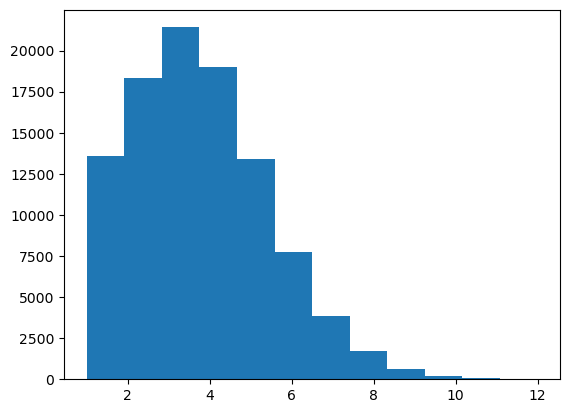

In [86]:
# use the product_margin file and create transactions that contain the product_id

n_trans = 100_000

# each transaction has 1-12 items
# set the parameters for the number of items
mean = 3.5
# generate the number of items per transaction
n_items = np.random.poisson(lam=mean, size=n_trans)
# clip to make sure it's within our bounds
n_items = np.clip(n_items, 1, 12)
# show the distribution
plt.hist(n_items, bins=12);

In [87]:
# iterate through n_items and select the corresponding number of items at random from the prod_id list

# create a list of product_ids
prod_ids_unique = list(marg['product_id'])

prod_ids = [random.sample(prod_ids_unique, n) for n in n_items]

# take the list of lists and generate a dataframe where the product_ids are in separate rows, and the transaction_id is repeated

# use enumerate to keep track of the transaction_id
# Create a list of tuples (transaction_id, product_id)
trans_list = [(i, prod) for i, prods in enumerate(prod_ids, 1) for prod in prods]

oid_df =  pd.DataFrame(trans_list, columns=['transaction_id', 'product_id'])
oid_df

,transaction_id,product_id
0,1,1311
1,1,1121
2,1,1211
3,1,4121
4,2,1123
...,...,...
353741,99998,4211
353742,99999,2121
353743,99999,2122
353744,100000,3221


In [88]:
# add product_quantity field to each transaction
# should be between 1 and 5, with a mode of 1 and skewed towards lower numbers

probas = [0.5, 0.2, 0.15, 0.1, 0.05]
qty = [1, 2, 3, 4, 5]

oid_df['product_quantity'] = np.random.choice(qty, size=len(oid_df), p=probas)
oid_df

,transaction_id,product_id,product_quantity
0,1,1311,4
1,1,1121,1
2,1,1211,3
3,1,4121,5
4,2,1123,1
...,...,...,...
353741,99998,4211,1
353742,99999,2121,1
353743,99999,2122,2
353744,100000,3221,1


In [89]:
oid_df['product_quantity'].value_counts(normalize=True)

product_quantity
1    0.500181
2    0.201317
3    0.150224
4    0.099068
5    0.049210
Name: proportion, dtype: float64

In [90]:
# create an index field for the oid table
# use transaction_id as the first part of the index and then just increment by 1 within each transaction_id

intra_line_number = oid_df.groupby('transaction_id').cumcount() + 1
oid_df['oid_id'] = oid_df['transaction_id'].astype(str) + intra_line_number.astype(str)
oid_df


,transaction_id,product_id,product_quantity,oid_id
0,1,1311,4,11
1,1,1121,1,12
2,1,1211,3,13
3,1,4121,5,14
4,2,1123,1,21
...,...,...,...,...
353741,99998,4211,1,999981
353742,99999,2121,1,999991
353743,99999,2122,2,999992
353744,100000,3221,1,1000001


In [91]:
# move oid_id to first column

# Reorder columns to move 'oid_id' to the first position
columns = ['oid_id'] + [col for col in oid_df.columns if col != 'oid_id']
oid_df = oid_df[columns]
oid_df

,oid_id,transaction_id,product_id,product_quantity
0,11,1,1311,4
1,12,1,1121,1
2,13,1,1211,3
3,14,1,4121,5
4,21,2,1123,1
...,...,...,...,...
353741,999981,99998,4211,1
353742,999991,99999,2121,1
353743,999992,99999,2122,2
353744,1000001,100000,3221,1


## Generate Order Summary Table

- randomly assign stores where the transaction occurred
- add dates
- then randomly assign times
    - the times should be distributed within dayparts
    - Breakfast: 5%
    - Lunch: 40%
    - Snack: 10%
    - Dinner: 30%
    - Latenight: 15%

In [92]:
summary = pd.merge(oid_df, marg, on='product_id', how='left')
summary['net_sales'] = summary['product_quantity'] * summary['avg_price']
summary =  summary.groupby(['transaction_id'])['net_sales'].sum().to_frame().reset_index()
summary

,transaction_id,net_sales
0,1,101.37
1,2,9.99
2,3,36.95
3,4,12.98
4,5,34.43
...,...,...
99995,99996,9.47
99996,99997,79.39
99997,99998,3.49
99998,99999,15.47


In [93]:
locs

,store_id,street_address,city,zip_code,dma_name,franchise_owner,franchise_name
0,0001,123 Main St,Lindaview,10178,New York,Annette Turner,Turner Food Inc
1,0002,124 Main St,Deannaland,60304,Chicago,Alexis Jefferson,Jefferson Food Inc
2,0003,125 Main St,Port Kaylaville,19006,Philadelphia,Amanda Greene,Greene Food Inc
3,0004,126 Main St,West William,15209,Pittsburgh,Corey Prince,Prince Food Inc
4,0005,127 Main St,East Stevenland,05141,Boston (Manchr),Melissa Johnson,Johnson Food Inc
...,...,...,...,...,...,...,...
95,0096,218 Main St,Richardfurt,75117,Dallas-Ft.Worth,Ms. April Bradley,April Food Inc
96,0097,219 Main St,East Jennifermouth,16018,Pittsburgh,Crystal Wilson,Wilson Food Inc
97,0098,220 Main St,Haynesville,19802,Philadelphia,Diane Daniels,Daniels Food Inc
98,0099,221 Main St,Lindaview,10178,New York,Shane Kim,Kim Food Inc


In [94]:
locs['store_id']

0     0001
1     0002
2     0003
3     0004
4     0005
      ... 
95    0096
96    0097
97    0098
98    0099
99    0100
Name: store_id, Length: 100, dtype: object

In [95]:
# add the store_id to each transaction
# randomly assign

summary['store_id'] = [random.choice(locs['store_id']) for _ in range(len(summary))]
summary

,transaction_id,net_sales,store_id
0,1,101.37,0071
1,2,9.99,0008
2,3,36.95,0063
3,4,12.98,0013
4,5,34.43,0016
...,...,...,...
99995,99996,9.47,0013
99996,99997,79.39,0033
99997,99998,3.49,0032
99998,99999,15.47,0084


In [96]:
# now add the date. Generate random dates between 2024-07-01 and 2024-09-30

start_date = pd.to_datetime('2024-07-01')
end_date = pd.to_datetime('2024-09-30')

summary['date'] = [fake.date_between(start_date=start_date, end_date=end_date) for _ in range(len(summary))]
summary

,transaction_id,net_sales,store_id,date
0,1,101.37,0071,2024-08-22
1,2,9.99,0008,2024-08-01
2,3,36.95,0063,2024-08-24
3,4,12.98,0013,2024-08-11
4,5,34.43,0016,2024-07-13
...,...,...,...,...
99995,99996,9.47,0013,2024-07-01
99996,99997,79.39,0033,2024-09-28
99997,99998,3.49,0032,2024-09-21
99998,99999,15.47,0084,2024-08-05


In [97]:
dim_daypart = pd.read_csv('./data/dim_daypart.csv') 
dim_daypart

,minute_id,daypart
0,0:00,Latenight
1,0:01,Latenight
2,0:02,Latenight
3,0:03,Latenight
4,0:04,Latenight
...,...,...
1435,23:55,Latenight
1436,23:56,Latenight
1437,23:57,Latenight
1438,23:58,Latenight


In [98]:
# now generate the times
    # - the times should be distributed within dayparts
    # - Breakfast: 5%
    # - Lunch: 40%
    # - Snack: 10%
    # - Dinner: 30%
    # - Latenight: 15%

In [99]:
probas = [0.05, 0.4, 0.1, 0.3, 0.15]
dayparts = ['Breakfast', 'Lunch', 'Snack', 'Dinner', 'Latenight']

summary['daypart'] = np.random.choice(dayparts, size=len(summary), p=probas)
summary

,transaction_id,net_sales,store_id,date,daypart
0,1,101.37,0071,2024-08-22,Dinner
1,2,9.99,0008,2024-08-01,Lunch
2,3,36.95,0063,2024-08-24,Lunch
3,4,12.98,0013,2024-08-11,Lunch
4,5,34.43,0016,2024-07-13,Latenight
...,...,...,...,...,...
99995,99996,9.47,0013,2024-07-01,Dinner
99996,99997,79.39,0033,2024-09-28,Dinner
99997,99998,3.49,0032,2024-09-21,Lunch
99998,99999,15.47,0084,2024-08-05,Lunch


In [100]:
summary_temp = summary[summary['daypart'] == 'Lunch']['transaction_id'].to_frame().reset_index(drop=True)
summary_temp

,transaction_id
0,2
1,3
2,4
3,8
4,10
...,...
39729,99986
39730,99990
39731,99998
39732,99999


In [101]:
daypart_counts = summary['daypart'].value_counts().to_dict()
daypart_counts

{'Lunch': 39734,
 'Dinner': 30046,
 'Latenight': 15063,
 'Snack': 10068,
 'Breakfast': 5089}

In [102]:
# iterate through the dayparts and generate the times
for dp in daypart_counts:
    # create a temporary dataframe for the daypart
    daypart_temp = dim_daypart[dim_daypart['daypart'] == dp]
    # randomly select a time within the daypart
    times = np.random.choice(daypart_temp['minute_id'], size=daypart_counts[dp])
    # create a temp dataframe for the transactions in the daypart
    summary_temp = summary[summary['daypart'] == dp]['transaction_id'].to_frame().reset_index(drop=True)
    summary_temp['order_time'] = times

    # # merge the temp dataframe back into the main dataframe
    # summary = pd.merge(summary, summary_temp, on='transaction_id', how='left')

    # Update the order_time in the main dataframe
    summary.loc[summary['transaction_id'].isin(summary_temp['transaction_id']), 'order_time'] = summary_temp['order_time'].values

# delete summary['daypart'] column
summary.drop('daypart', axis=1, inplace=True)

summary

,transaction_id,net_sales,store_id,date,order_time
0,1,101.37,0071,2024-08-22,17:16
1,2,9.99,0008,2024-08-01,13:26
2,3,36.95,0063,2024-08-24,13:56
3,4,12.98,0013,2024-08-11,13:09
4,5,34.43,0016,2024-07-13,0:25
...,...,...,...,...,...
99995,99996,9.47,0013,2024-07-01,22:29
99996,99997,79.39,0033,2024-09-28,19:40
99997,99998,3.49,0032,2024-09-21,13:28
99998,99999,15.47,0084,2024-08-05,12:48


# Examine "Final" dataframes

In [108]:
dim_daypart
# save to database folder
dim_daypart.to_csv('data/db_data/dim_daypart.csv', index=False)

In [109]:
locs
# save to database folder
locs.to_csv('data/db_data/dim_location.csv', index=False)

In [110]:
marg
# save to database folder
marg.to_csv('data/db_data/product_margin.csv', index=False)

In [111]:
summary
# save to database folder
summary.to_csv('data/db_data/order_summary.csv', index=False)

In [112]:
oid_df
# save to database folder
oid_df.to_csv('data/db_data/order_item_detail.csv', index=False)